In [364]:
import pandas as pd
from operator import le
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_theme()

In [365]:
# Chargement du fichier source
data = pd.read_csv(r'C:\Users\M\Data Scientist\MLOPS\weatherAUS.csv', sep=',',encoding='latin-1')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [366]:
# Analyse de données

In [367]:
data.shape

(145460, 23)

In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [369]:
# Analyse statistique sur les variables de type 'object'
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [370]:
# Analyse statistique sur les variables de type 'object'
data.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [371]:
# Analyse de la variable cible
data['RainTomorrow'].value_counts(dropna=False)

No     110316
Yes     31877
NaN      3267
Name: RainTomorrow, dtype: int64

In [372]:
# Suppression des lignes avec RainTomorrow = NaN
df = data.dropna(subset=['RainTomorrow'])
df['RainTomorrow'].value_counts(dropna=False)

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [373]:
# Analyse de la variable 'RainToday'
df['RainToday'].value_counts(dropna=False)

No     109332
Yes     31455
NaN      1406
Name: RainToday, dtype: int64

In [374]:
# Suppression des lignes avec RainToday = NaN
df2=df.dropna(subset=['RainToday'])
df2['RainToday'].value_counts(dropna=False)


No     109332
Yes     31455
Name: RainToday, dtype: int64

In [375]:
# Suppression de la données Date (non utilisée pour le moment)
df2.drop('Date', axis=1, inplace = True)

C:\Users\M\AppData\Local\Temp\ipykernel_4200\864884208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('Date', axis=1, inplace = True)


In [376]:
# Identification de la présence et suppression des NULL dans chacune des colonnes
data_types = pd.DataFrame(df2.dtypes, columns=['Data Types'])
data_count = pd.DataFrame(df2.count(), columns=['Data Count'])
count_of_nulls = pd.DataFrame(df2.isnull().sum(), columns=['Count of Nulls'])
data_dictionary = pd.concat([data_types, data_count, count_of_nulls], axis='columns')
data_dictionary['Rate of nulls'] = 100 * (data_dictionary['Count of Nulls'] / data_dictionary['Data Count'])
data_dictionary

,Data Types,Data Count,Count of Nulls,Rate of nulls
Location,object,140787,0,0.000000
MinTemp,float64,140319,468,0.333526
MaxTemp,float64,140480,307,0.218536
Rainfall,float64,140787,0,0.000000
Evaporation,float64,81093,59694,73.611779
Sunshine,float64,73982,66805,90.298992
WindGustDir,object,131624,9163,6.961496
WindGustSpeed,float64,131682,9105,6.914385
WindDir9am,object,131127,9660,7.366904
WindDir3pm,object,137117,3670,2.676546


In [377]:
# Affichage des variables présentant trop de valeurs NULL (> 50%)
to_delete = data_dictionary.loc[data_dictionary['Rate of nulls'] > 50]
features_to_delete = np.array(to_delete.index.values)
print(features_to_delete)
df2.drop(features_to_delete, axis=1, inplace=True)
df2

['Evaporation' 'Sunshine' 'Cloud9am' 'Cloud3pm']


C:\Users\M\AppData\Local\Temp\ipykernel_4200\1878749576.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(features_to_delete, axis=1, inplace=True)


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [378]:
# 3 / Identification des variables restantes avec NaN
df2.isnull().sum()

Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [379]:
# 3-1 / Traitement des NaN des valeurs de type 'object'
df2.select_dtypes(include='object').isnull().sum()

Location           0
WindGustDir     9163
WindDir9am      9660
WindDir3pm      3670
RainToday          0
RainTomorrow       0
dtype: int64

In [380]:
# Fonction pour les valeurs de type 'object', qui permet de remplacer les vealeurs NULL par ffill 
# ffil: last valid observation forward to next valid
# ok car mesures prises dans le temps à 24h d'intervalle (ex. mesure prise la veille = mesure d'aujourd'hui)
def replace_object(df):
    for col in df.select_dtypes('object'):
        df[col] = df[col].fillna(method='ffill')
    return df

In [381]:
df2 = replace_object(df2)

C:\Users\M\AppData\Local\Temp\ipykernel_4200\1338382459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(method='ffill')


In [382]:
# Vérification du traitement des valeurs NULL des variaibles de type 'object'
df2.select_dtypes(include='object').isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [383]:
# Traitement des valeur NULL dans les collones avec data type des valeurs numériques
# Fonction qui permet de remplacer les valeur NULL par la médiane

def replace_numerical(df):
    for col in df.select_dtypes(['int', 'float']):
        df[col] = df[col].fillna(df[col].median())
    return df

In [384]:
df2 = replace_numerical(df2)

C:\Users\M\AppData\Local\Temp\ipykernel_4200\2853176691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())


In [385]:
# Vérification du traitement des NaN des varaibles numériques
df2.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [386]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  object 
 1   MinTemp        140787 non-null  float64
 2   MaxTemp        140787 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    140787 non-null  object 
 5   WindGustSpeed  140787 non-null  float64
 6   WindDir9am     140787 non-null  object 
 7   WindDir3pm     140787 non-null  object 
 8   WindSpeed9am   140787 non-null  float64
 9   WindSpeed3pm   140787 non-null  float64
 10  Humidity9am    140787 non-null  float64
 11  Humidity3pm    140787 non-null  float64
 12  Pressure9am    140787 non-null  float64
 13  Pressure3pm    140787 non-null  float64
 14  Temp9am        140787 non-null  float64
 15  Temp3pm        140787 non-null  float64
 16  RainToday      140787 non-null  object 
 17  RainTomorrow   140787 non-nul

In [387]:
df2['RainTomorrow'].value_counts(dropna=False)

No     109586
Yes     31201
Name: RainTomorrow, dtype: int64

In [388]:
# 5 / Traitement des variables catégorielles

In [389]:
# LOCATION
df2.Location.value_counts()

Canberra            3402
Sydney              3331
Perth               3193
Darwin              3192
Hobart              3183
Brisbane            3132
Bendigo             3030
Townsville          3027
AliceSprings        3025
MountGambier        3022
Launceston          3020
Adelaide            3020
Ballarat            3017
PerthAirport        3009
MelbourneAirport    3009
Mildura             3005
SydneyAirport       3001
Albany              2996
Nuriootpa           2996
Sale                2992
Albury              2991
Watsonia            2990
Woomera             2984
Portland            2984
Cobar               2980
Cairns              2964
Tuggeranong         2959
WaggaWagga          2958
NorfolkIsland       2944
Wollongong          2943
SalmonGums          2941
CoffsHarbour        2940
Dartmoor            2939
Newcastle           2929
Witchcliffe         2924
GoldCoast           2924
Penrith             2911
Richmond            2906
NorahHead           2888
BadgerysCreek       2877


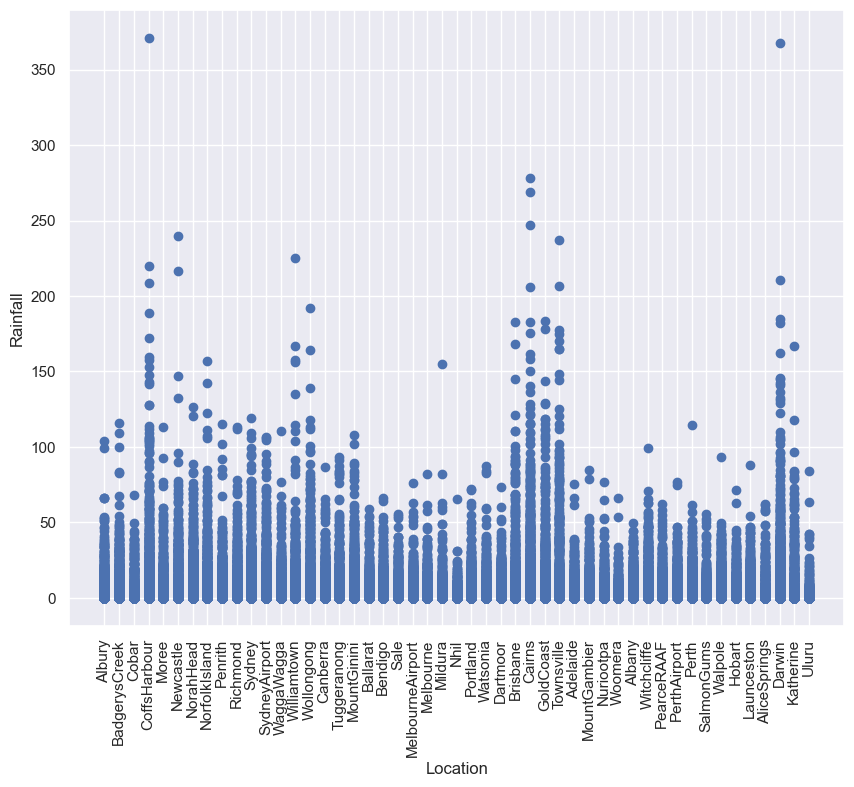

In [390]:
plt.figure(figsize=(10,8))
plt.scatter(df2['Location'],df2['Rainfall'])
plt.xlabel("Location")
plt.xticks(rotation=90)
plt.ylabel("Rainfall")
plt.show()

In [391]:
df2.WindGustDir.value_counts()

W      17063
SE      9371
E       9104
N       9019
SSE     8990
S       8949
WSW     8895
SW      8887
SSW     8611
WNW     8079
NW      8041
ENE     8036
ESE     7354
NE      7104
NNW     6826
NNE     6458
Name: WindGustDir, dtype: int64

In [392]:
df2.WindDir9am.value_counts()

N      11962
NW      9891
SE      9831
E       9460
SSE     9429
S       9013
SW      8999
W       8692
NNE     8383
NNW     8260
NE      8132
ENE     8124
ESE     7929
SSW     7927
WNW     7524
WSW     7231
Name: WindDir9am, dtype: int64

In [393]:
df2.WindDir3pm.value_counts()

SE     11634
W       9921
SW      9919
S       9558
WSW     9324
SSE     9118
WNW     9097
N       8700
NW      8603
ESE     8373
E       8362
NE      8253
SSW     8013
NNW     7749
ENE     7722
NNE     6441
Name: WindDir3pm, dtype: int64

C:\Users\M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


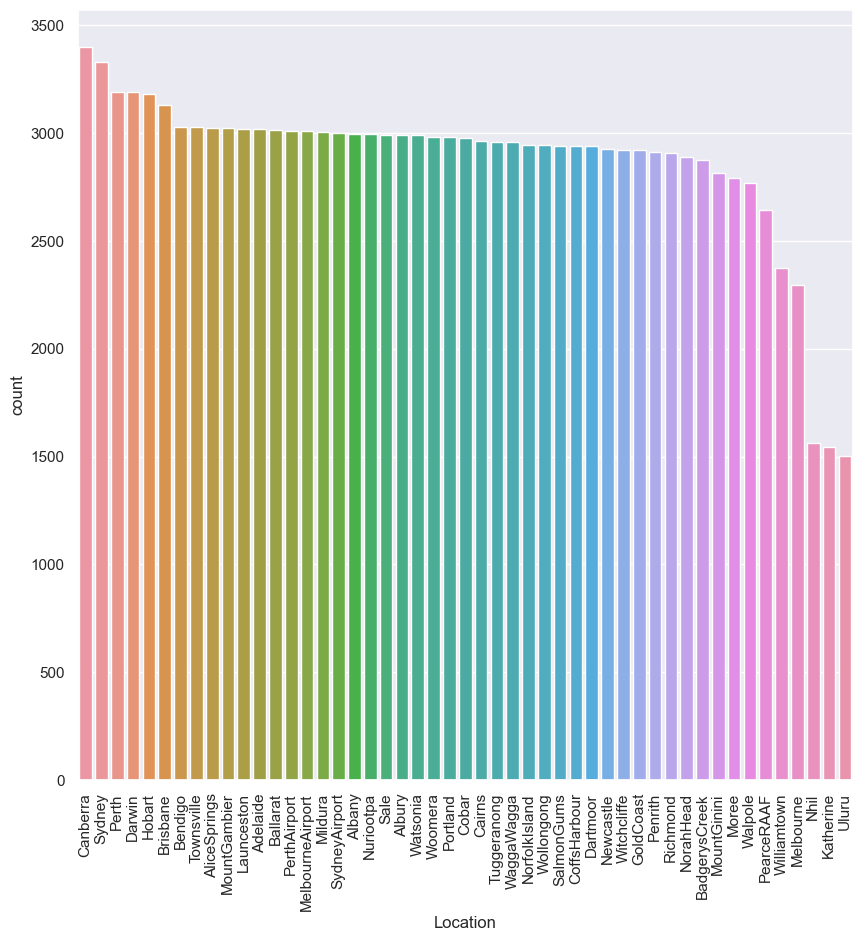

C:\Users\M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


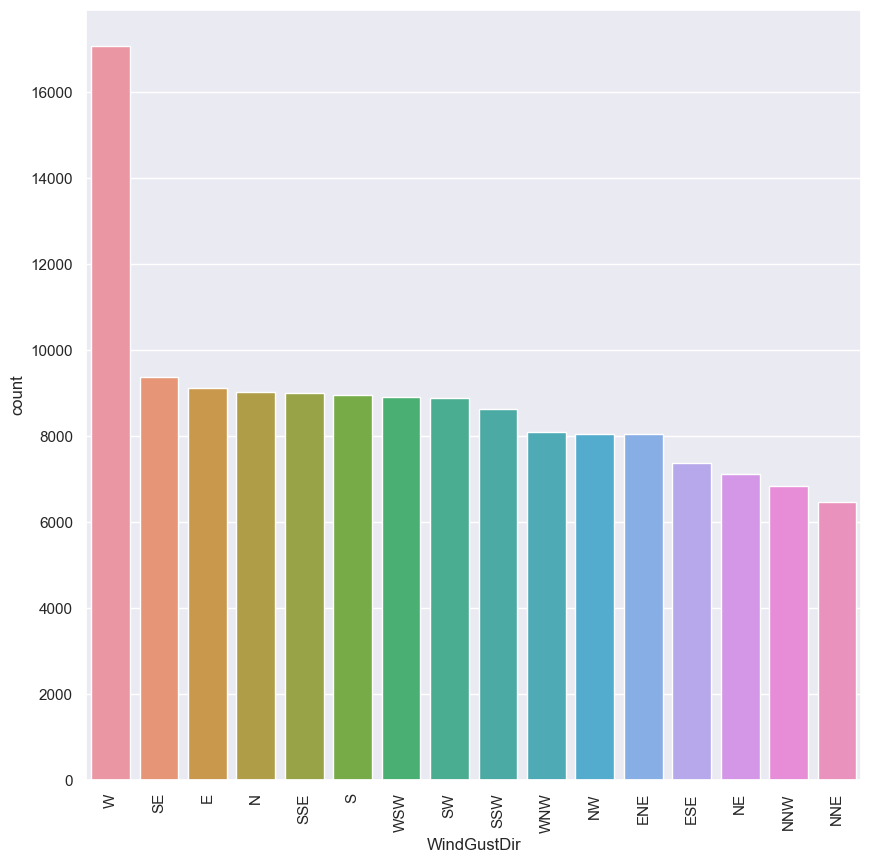

C:\Users\M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


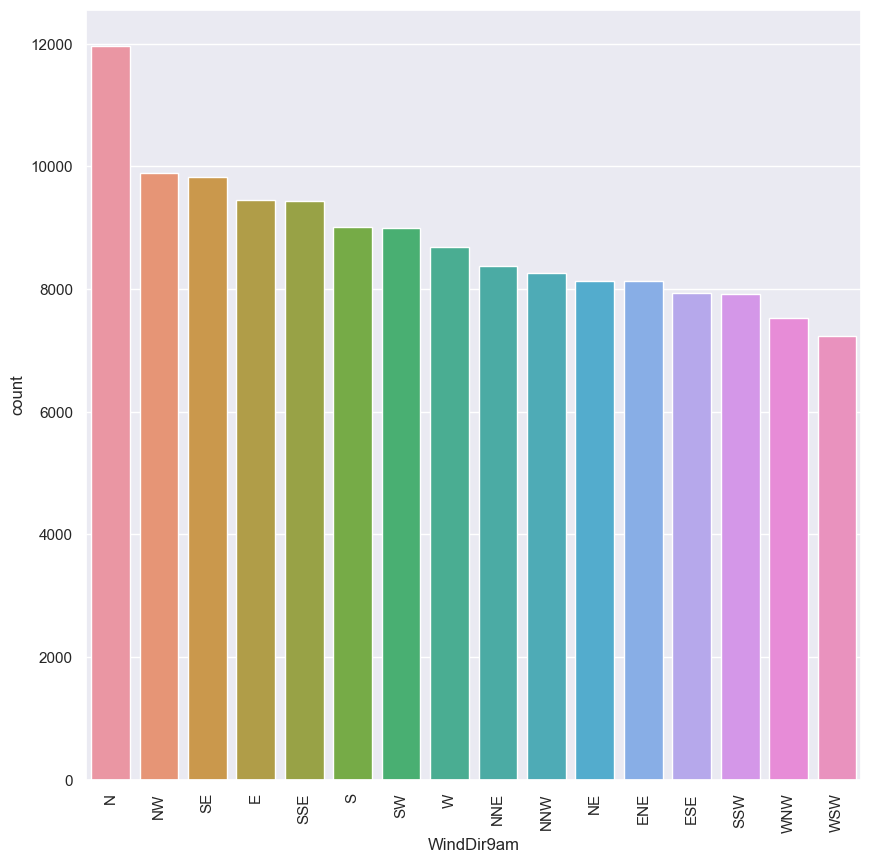

C:\Users\M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


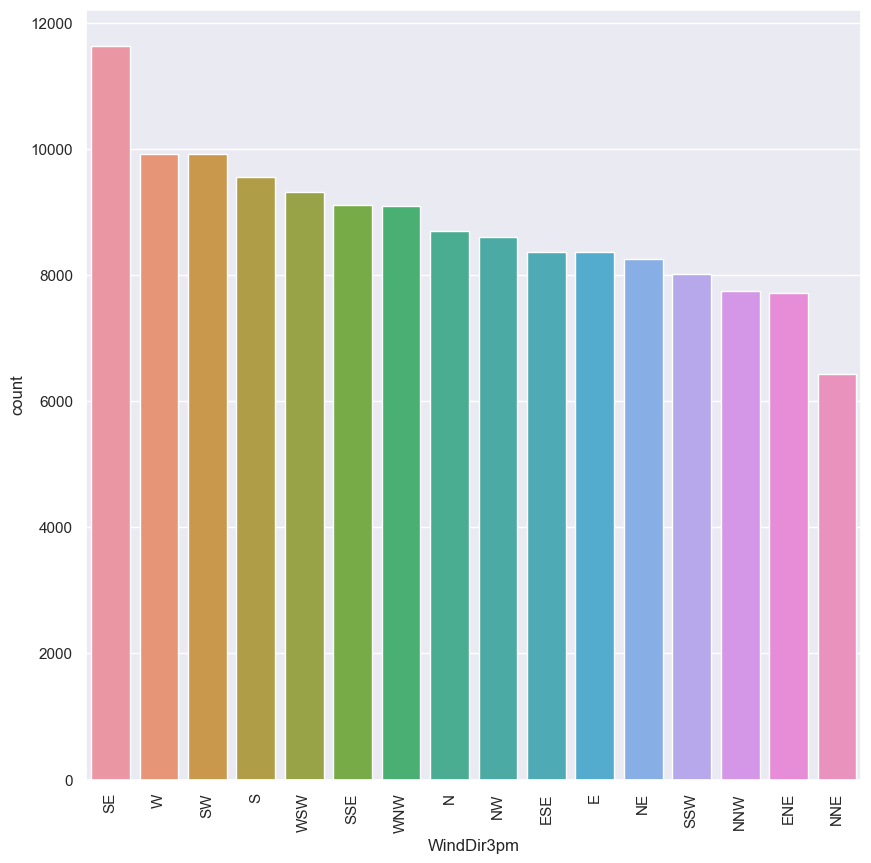

C:\Users\M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


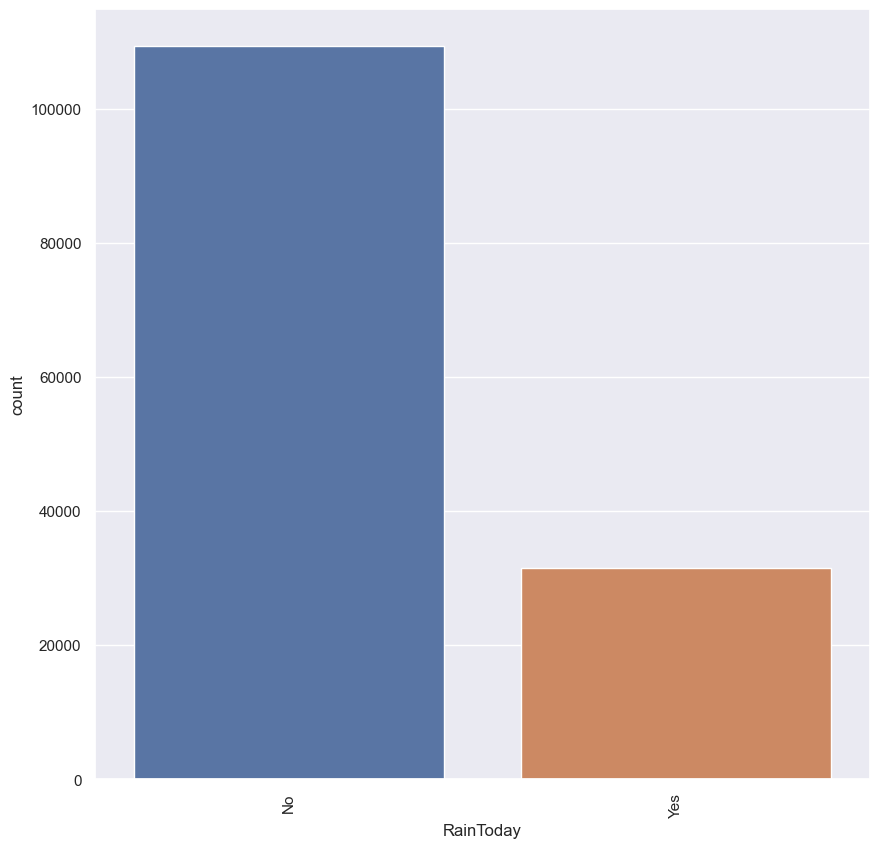

C:\Users\M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


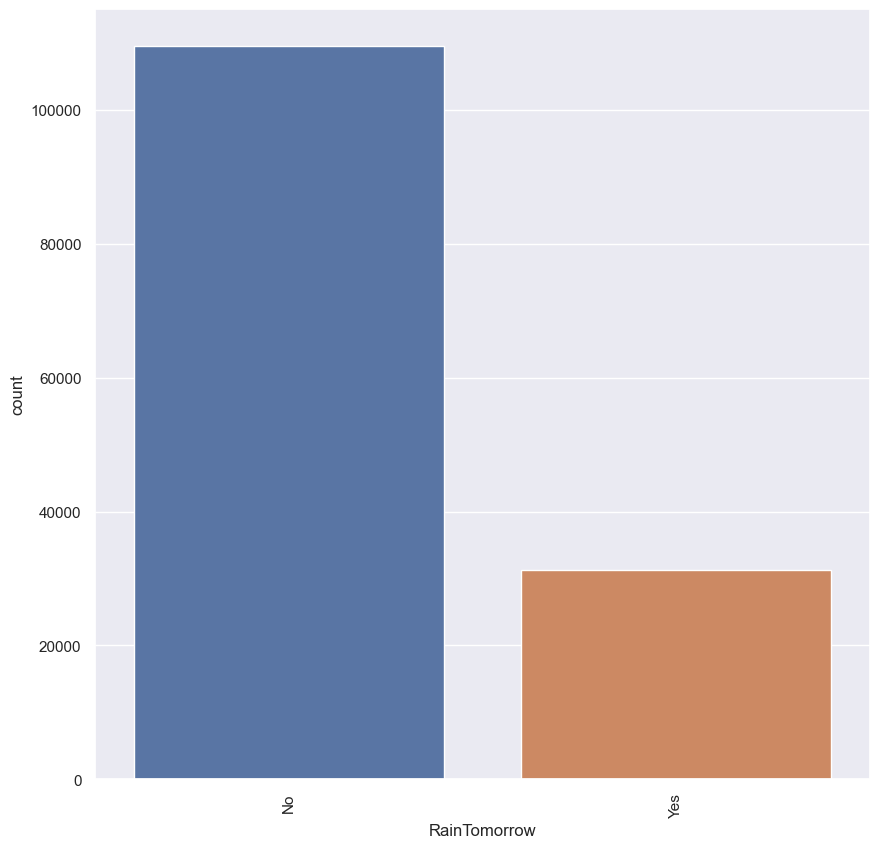

In [394]:
# Visualise the object features in the dataset
cat_col = df2.select_dtypes('object')
cat_col.describe()
for i in cat_col:
    plt.figure(figsize=(10,10))
    sns.countplot(cat_col[i], orient = 'h', order = cat_col[i].value_counts().index)
    plt.xticks(rotation = 90)
    plt.show()


In [395]:
# Supprimer les duplicates 
df2 = df2.drop_duplicates()
print("\nThe data table contains:",df2.duplicated().sum(),"duplicate rows after removing the duplicate rows. \n")
df2


The data table contains: 0 duplicate rows after removing the duplicate rows. 



,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [396]:
# Print a list of unique values in each categorical column
col_cat_list=('WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow')
for i in col_cat_list:
  print(i, ": ", df2[i].unique())

WindGustDir :  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
WindDir9am :  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
WindDir3pm :  ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
RainToday :  ['No' 'Yes']
RainTomorrow :  ['No' 'Yes']


In [421]:
# Perform label encoding on the categorical binary columns

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Location'] = le.fit_transform(df2['Location'])
df2['WindGustDir'] = le.fit_transform(df2['WindGustDir'])
df2['WindDir9am'] = le.fit_transform(df2['WindDir9am'])
df2['WindDir3pm'] = le.fit_transform(df2['WindDir3pm'])
df2['RainToday'] = le.fit_transform(df2['RainToday'])
df2['RainTomorrow'] = le.fit_transform(df2['RainTomorrow'])
df2

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
145455,41,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,41,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,41,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


In [398]:
# Print a list of unique values in each categorical column
col_cat_list=('Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow')
for i in col_cat_list:
  print(i, ": ", df2[i].unique())

Location :  [ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41]
WindGustDir :  [13 14 15  4  6  3  5 12  1 10  8  7  9  2  0 11]
WindDir9am :  [13  6  9  1 12 10  8  4 11  3 15  2  0  7 14  5]
WindDir3pm :  [14 15  0  7 13 10  2  1  6 11 12  9  3  8  5  4]
RainToday :  [0 1]
RainTomorrow :  [0 1]


In [399]:
# Pandas get_dummies API for one-hot encoding (ohe)
#df2_ohe = pd.get_dummies(data=df2, columns=['Location','WindGustDir','WindDir9am','WindDir3pm'])

In [400]:
# Transformer les variables 'RainTomorrow' et 'RainToday' en variable binaires
#df2_ohe['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
#df2_ohe['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [401]:
df2['RainTomorrow'].value_counts(dropna=False)

0    109557
1     31201
Name: RainTomorrow, dtype: int64

In [402]:
from sklearn.model_selection import train_test_split

features = df2.drop(['RainTomorrow'], axis=1)
target = df2['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)


In [403]:
print("features vector:", features.shape)
print("target vector:",target.shape)
target.value_counts()

features vector: (140758, 17)
target vector: (140758,)


0    109557
1     31201
Name: RainTomorrow, dtype: int64

In [404]:
# Standardizing data: utilisation de MinMaxScaler au lieu de StandardScaler pour éviter d'avoir des valeurs négatives
#from sklearn import preprocessing

#MM_scaler = preprocessing.MinMaxScaler()
#X_train = MM_scaler.fit_transform(X_train)
#X_test = MM_scaler.transform(X_test)

In [405]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [406]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.8429099175902245
ROC Area under Curve = 0.7053511256903896
Cohen's Kappa = 0.4736244134397566
Time taken = 108.26888871192932
              precision    recall  f1-score   support

           0    0.86122   0.95175   0.90422     27418
           1    0.72945   0.45896   0.56342      7772

    accuracy                        0.84291     35190
   macro avg    0.79533   0.70535   0.73382     35190
weighted avg    0.83212   0.84291   0.82895     35190



C:\Users\M\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


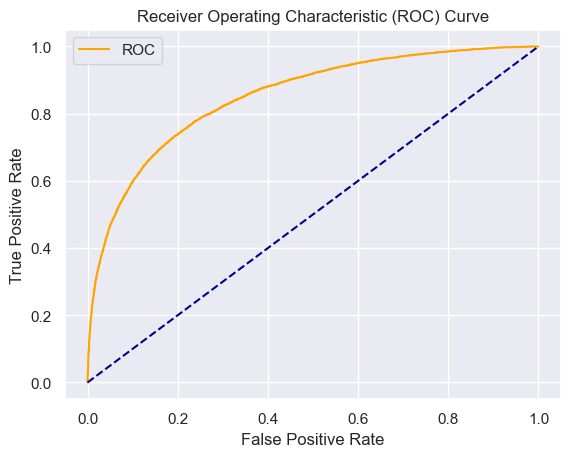

C:\Users\M\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


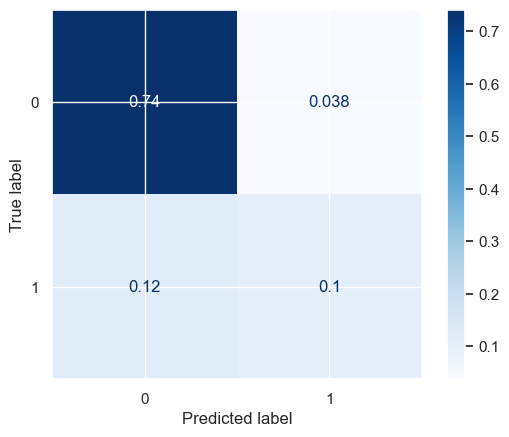

In [407]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}
model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.854305200341006
ROC Area under Curve = 0.7257093786077022
Cohen's Kappa = 0.5160524658307977
Time taken = 20.397199869155884
              precision    recall  f1-score   support

           0    0.86985   0.95605   0.91092     27418
           1    0.76162   0.49537   0.60030      7772

    accuracy                        0.85431     35190
   macro avg    0.81574   0.72571   0.75561     35190
weighted avg    0.84595   0.85431   0.84231     35190



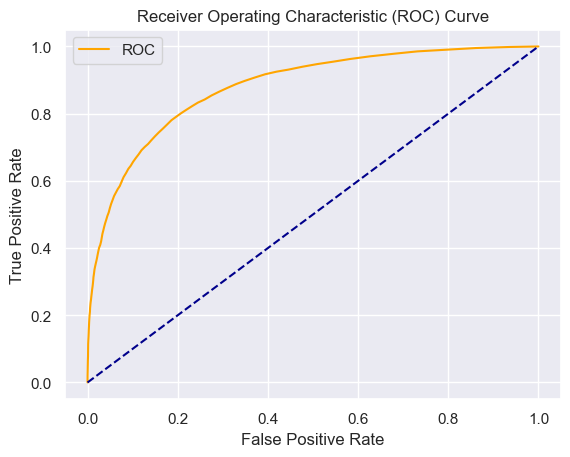

C:\Users\M\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


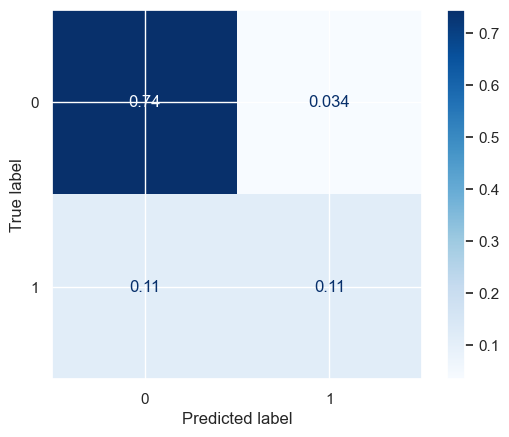

In [408]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'random_state': 42}
model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.8587098607558966
ROC Area under Curve = 0.7439785876095912
Cohen's Kappa = 0.5430835654719763
Time taken = 2.5689263343811035
              precision    recall  f1-score   support

           0    0.87890   0.94949   0.91283     27418
           1    0.75135   0.53847   0.62734      7772

    accuracy                        0.85871     35190
   macro avg    0.81512   0.74398   0.77009     35190
weighted avg    0.85073   0.85871   0.84978     35190



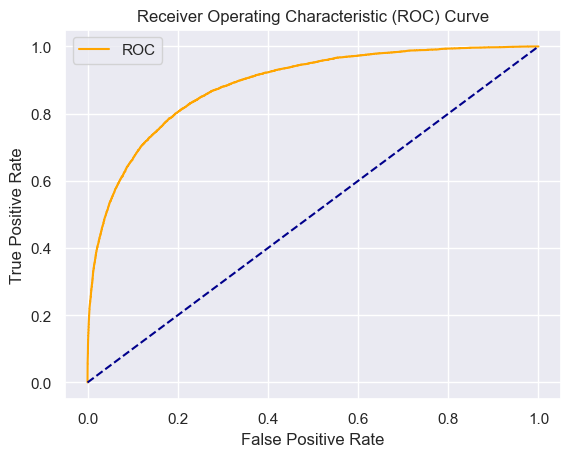

C:\Users\M\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


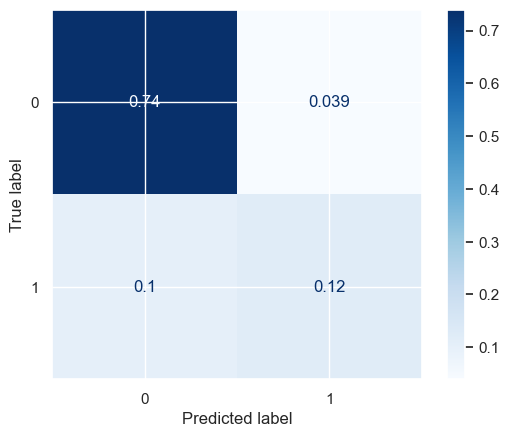

In [409]:
import xgboost as xgb
params_xgb = {'random_state': 42}
model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

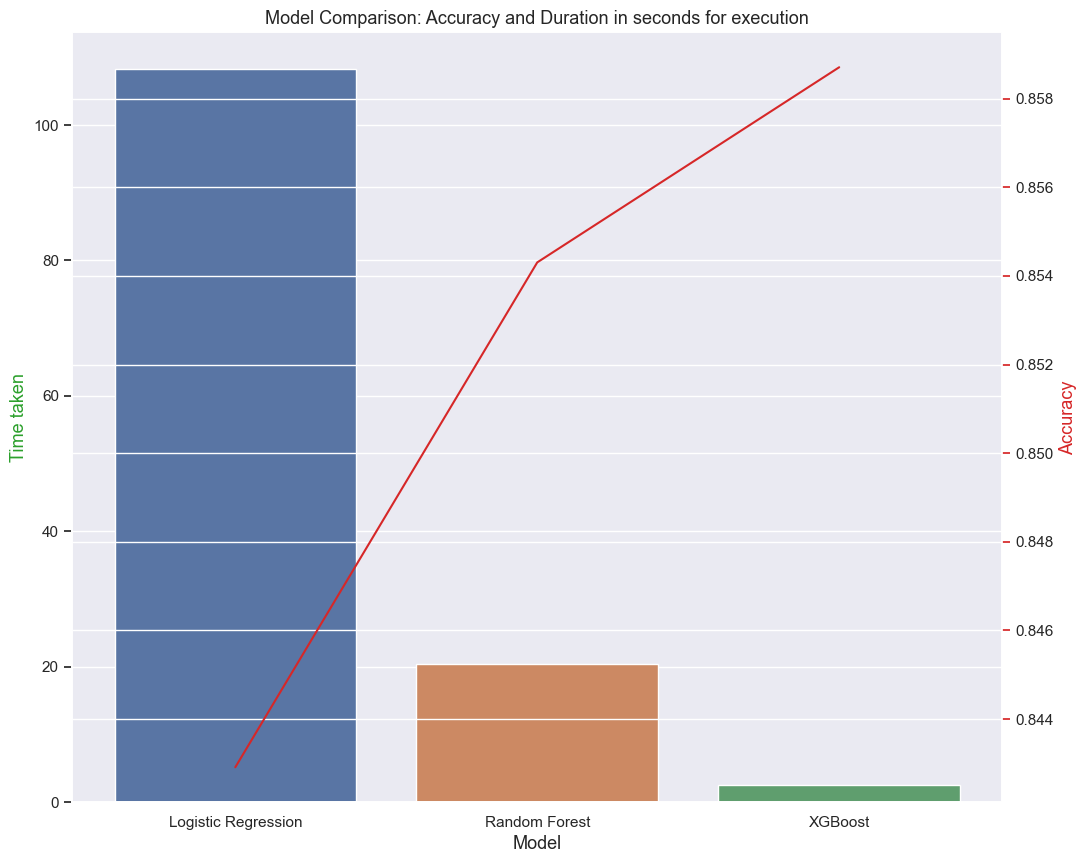

In [410]:
accuracy_scores = [accuracy_lr, accuracy_rf, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_rf, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_rf, coh_kap_xgb]
tt = [tt_lr, tt_rf, tt_xgb]

model_data = {'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Duration in seconds for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Duration in seconds', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [411]:
# Class balancing avec OverSampling (SMOTE)
from imblearn.over_sampling import SMOTE

smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)

print('Classes échantillon before oversampling :', dict(pd.Series(y_train).value_counts()))
print('Classes échantillon après oversampling :', dict(pd.Series(y_sm).value_counts()))


Classes échantillon before oversampling : {0: 82139, 1: 23429}
Classes échantillon après oversampling : {1: 82139, 0: 82139}


Accuracy = 0.7796533105996022
ROC Area under Curve = 0.7670472853748118
Cohen's Kappa = 0.4548040254683041
Time taken = 249.1208963394165
              precision    recall  f1-score   support

           0    0.91598   0.78963   0.84812     27418
           1    0.50078   0.74447   0.59878      7772

    accuracy                        0.77965     35190
   macro avg    0.70838   0.76705   0.72345     35190
weighted avg    0.82428   0.77965   0.79305     35190



C:\Users\M\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


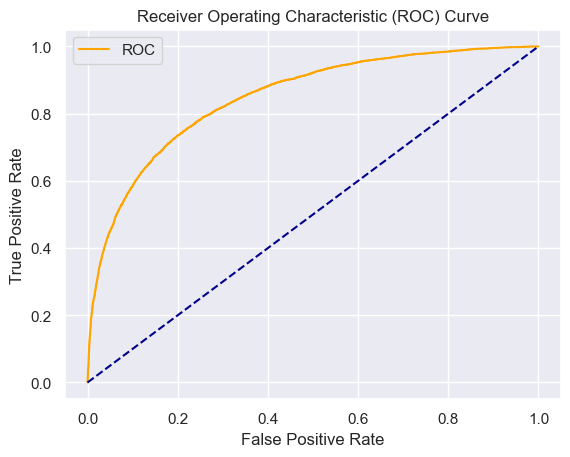

C:\Users\M\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


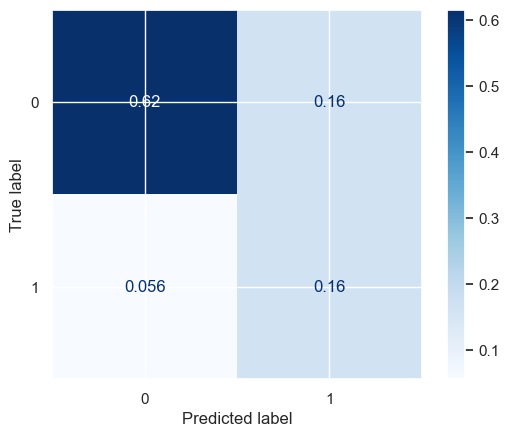

In [412]:
# Logistic Regression with SMOTE
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}
model_lr_sm = LogisticRegression(**params_lr)
model_lr_sm, accuracy_lr_sm, roc_auc_lr_sm, coh_kap_lr_sm, tt_lr_sm = run_model(model_lr_sm, X_sm, y_sm, X_test, y_test)

Accuracy = 0.8457516339869281
ROC Area under Curve = 0.7687607509550679
Cohen's Kappa = 0.5453141313715579
Time taken = 43.01129674911499
              precision    recall  f1-score   support

           0    0.89653   0.90667   0.90157     27418
           1    0.65706   0.63085   0.64369      7772

    accuracy                        0.84575     35190
   macro avg    0.77680   0.76876   0.77263     35190
weighted avg    0.84364   0.84575   0.84462     35190



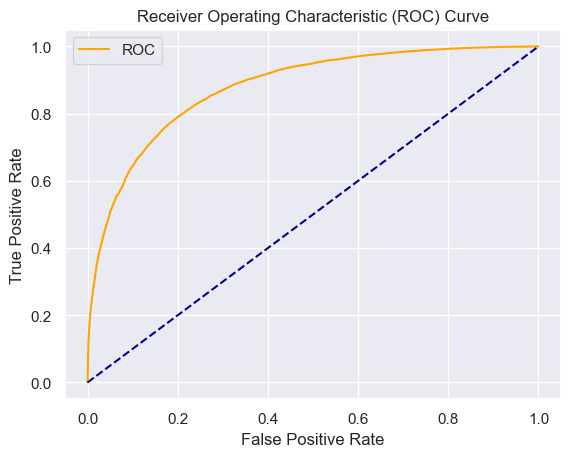

C:\Users\M\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


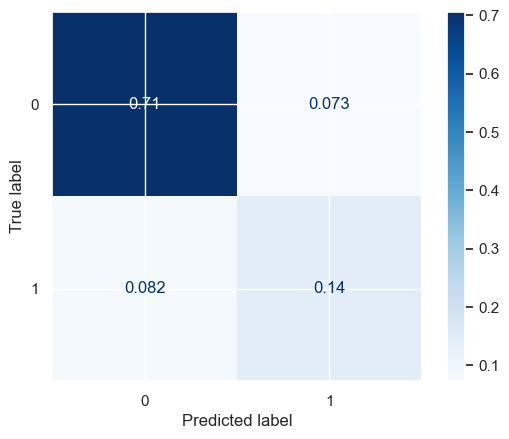

In [413]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'random_state': 42}
model_rf_sm = RandomForestClassifier(**params_rf)
model_rf_sm, accuracy_rf_sm, roc_auc_rf_sm, coh_kap_rf_sm, tt_rf_sm = run_model(model_rf_sm, X_sm, y_sm, X_test, y_test)

Accuracy = 0.8544188689968741
ROC Area under Curve = 0.7484161024458577
Cohen's Kappa = 0.5401308324815806
Time taken = 4.230386018753052
              precision    recall  f1-score   support

           0    0.88233   0.93829   0.90945     27418
           1    0.71954   0.55854   0.62890      7772

    accuracy                        0.85442     35190
   macro avg    0.80093   0.74842   0.76918     35190
weighted avg    0.84637   0.85442   0.84749     35190



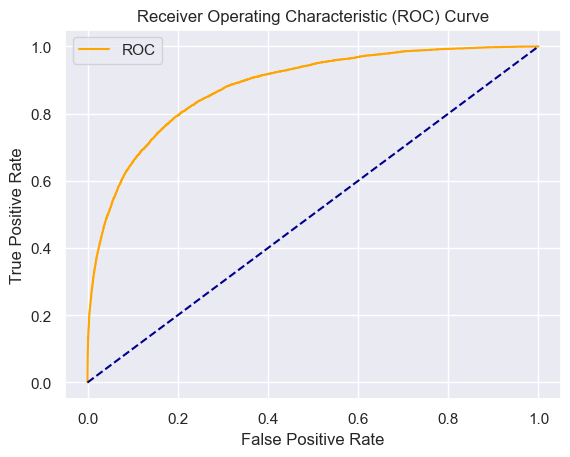

C:\Users\M\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


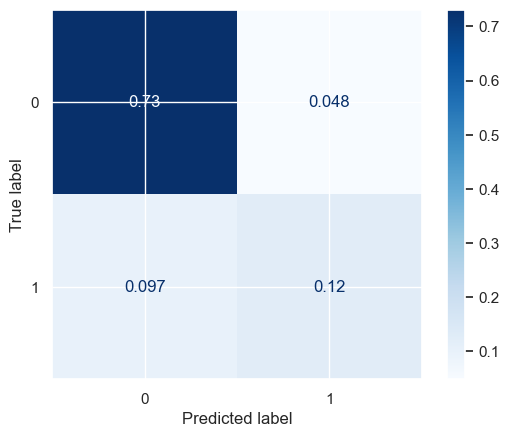

In [414]:
import xgboost as xgb
params_xgb = {'random_state': 42}
model_xgb_sm = xgb.XGBClassifier(**params_xgb)
model_xgb_sm, accuracy_xgb_sm, roc_auc_xgb_sm, coh_kap_xgb_sm, tt_xgb_sm = run_model(model_xgb_sm, X_sm, y_sm, X_test, y_test)

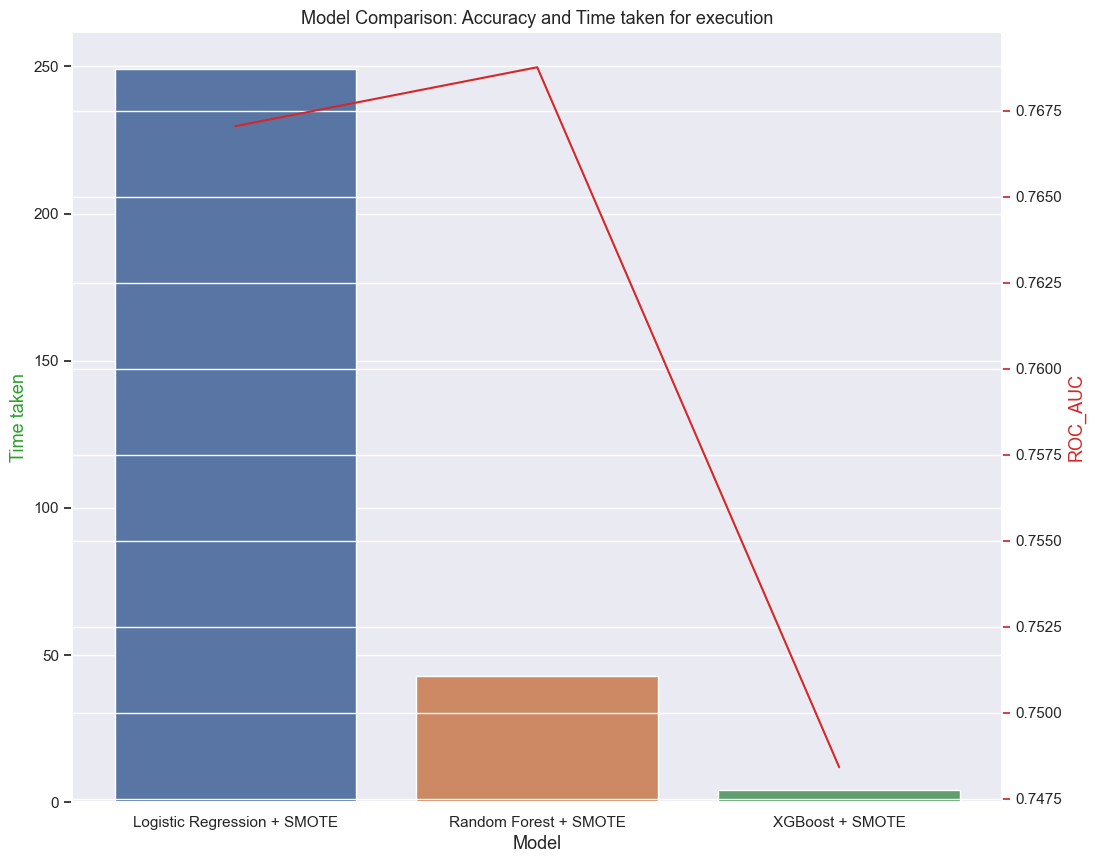

In [415]:
accuracy_scores_sm = [accuracy_lr_sm, accuracy_rf_sm, accuracy_xgb_sm]
roc_auc_scores_sm = [roc_auc_lr_sm, roc_auc_rf_sm, roc_auc_xgb_sm]
coh_kap_scores_sm = [coh_kap_lr_sm, coh_kap_rf_sm, coh_kap_xgb_sm]
tt_sm = [tt_lr_sm, tt_rf_sm, tt_xgb_sm]

model_data = {'Model': ['Logistic Regression + SMOTE', 'Random Forest + SMOTE', 'XGBoost + SMOTE'],
              'Accuracy': accuracy_scores_sm,
              'ROC_AUC': roc_auc_scores_sm,
              'Cohen_Kappa': coh_kap_scores_sm,
              'Time taken': tt_sm}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [416]:
import pickle
pickle.dump(model_rf_sm, open('model_rf_sm.pkl', 'wb'))

In [417]:
# Create a simple RandomForest Model
RF = RandomForestClassifier(random_state=42)

# Train the model
RF.fit(X_sm, y_sm)

# Test the model on the test dataset
y_pred = RF.predict(X_test)
y_pred_proba = RF.predict_proba(X_test)[:, 1]

print ("Accuracy = ", accuracy_score(y_test, y_pred))

Accuracy =  0.8457516339869281


In [418]:
#Print the test dataset including the original labels and the predicted labels, in this case by means of a Random Forest
TestSamples=X_test.copy()
TestSamples['RainTomorrow']=y_test
TestSamples['PREDICTION']=y_pred_proba
TestSamples.head(10)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,PREDICTION
123263,31,11.9,21.4,7.0,12,43.0,13,15,13.0,17.0,91.0,69.0,1013.4,1013.8,17.5,20.3,1,0,0.68
35891,38,12.2,18.2,4.2,8,54.0,11,8,33.0,30.0,69.0,60.0,1023.8,1021.1,14.9,16.8,1,0,0.56
91685,14,20.7,29.6,0.0,8,57.0,10,2,31.0,20.0,65.0,67.0,1016.9,1015.4,24.6,25.2,0,0,0.38
51367,40,2.8,15.3,0.0,7,50.0,3,6,17.0,19.0,70.0,68.0,1016.4,1013.4,8.6,12.5,0,1,0.71
51384,40,-3.5,11.9,0.0,3,22.0,13,3,2.0,7.0,74.0,40.0,1021.4,1020.3,3.2,11.2,0,0,0.17
26340,30,16.7,22.7,2.2,1,19.0,11,7,7.0,4.0,98.0,71.0,1017.6,1015.2,18.4,22.5,1,0,0.42
81372,12,14.4,40.7,0.0,2,37.0,0,10,15.0,9.0,63.0,17.0,1016.1,1013.0,20.7,38.4,0,0,0.04
116250,29,6.4,21.7,49.8,7,74.0,3,6,26.0,46.0,68.0,56.0,1014.2,1008.6,14.8,19.4,1,1,0.68
120568,32,14.5,22.2,0.0,8,33.0,8,8,22.0,19.0,74.0,56.0,1015.3,1013.2,16.9,21.4,0,0,0.17
71737,20,12.1,21.4,2.4,11,48.0,8,11,9.0,28.0,80.0,60.0,1014.9,1015.6,15.0,16.1,1,0,0.70


In [419]:
#Select and display a positive and a negative testcase
display(TestSamples.iloc[4])
display(TestSamples.iloc[7])

Location           40.00
MinTemp            -3.50
MaxTemp            11.90
Rainfall            0.00
WindGustDir         3.00
WindGustSpeed      22.00
WindDir9am         13.00
WindDir3pm          3.00
WindSpeed9am        2.00
WindSpeed3pm        7.00
Humidity9am        74.00
Humidity3pm        40.00
Pressure9am      1021.40
Pressure3pm      1020.30
Temp9am             3.20
Temp3pm            11.20
RainToday           0.00
RainTomorrow        0.00
PREDICTION          0.17
Name: 51384, dtype: float64

Location           29.00
MinTemp             6.40
MaxTemp            21.70
Rainfall           49.80
WindGustDir         7.00
WindGustSpeed      74.00
WindDir9am          3.00
WindDir3pm          6.00
WindSpeed9am       26.00
WindSpeed3pm       46.00
Humidity9am        68.00
Humidity3pm        56.00
Pressure9am      1014.20
Pressure3pm      1008.60
Temp9am            14.80
Temp3pm            19.40
RainToday           1.00
RainTomorrow        1.00
PREDICTION          0.68
Name: 116250, dtype: float64

In [422]:
# Saving and testing the model on the positive and negative testcase
import warnings
warnings.filterwarnings('ignore')


import pickle
pickle.dump(model_rf_sm, open('model_rf_sm.pkl', 'wb'))
model = pickle.load(open('model_rf_sm.pkl','rb'))

Rain = [[29, 6.4, 21.7, 49.8, 7, 74.0, 3, 6, 26.0, 46.0, 68.0, 56.0, 1014.2, 1008.6, 14.8, 19.4,1]]
NoRain = [[40,-3.5, 11.9, 0.0, 3, 22.0, 13, 3, 2.0, 7.0, 74.0, 40.0, 1021.4, 1020.3, 3.2, 11.2, 0]]

print("Il va pleuvoir demain: ", model.predict_proba(Rain)[:, 1],"-", Rain)
print("Il sera sec:", model.predict_proba(NoRain)[:, 1],"-", NoRain,"\n")


Il va pleuvoir demain:  [0.68] - [[29, 6.4, 21.7, 49.8, 7, 74.0, 3, 6, 26.0, 46.0, 68.0, 56.0, 1014.2, 1008.6, 14.8, 19.4, 1]]
Il sera sec: [0.17] - [[40, -3.5, 11.9, 0.0, 3, 22.0, 13, 3, 2.0, 7.0, 74.0, 40.0, 1021.4, 1020.3, 3.2, 11.2, 0]] 

